i        r                    p                    m                    q         
0        0.0001               1000000000000        0                    15865.28732582074
1        0.10010000000000001  999935395084.0692    66.6559285960396     15865.029259377112
2        0.2001               999779470981.0933    532.4411795966186    15864.406383042808
3        0.30010000000000003  999520864863.2307    1796.0389001843268   15863.37321760668
4        0.4001               999159106745.8274    4256.023181623599    15861.927734651053
5        0.5001               998694151065.5962    8310.796861673698    15860.069540643337
6        0.6001               998126026893.4623    14358.529258063281   15857.798479683446
7        0.7001               997454791528.1365    22797.093881514127   15855.11444808874
8        0.8000999999999999   996680520200.7687    34024.00612763039    15852.017353214804
9        0.9000999999999999   995803303019.1592    48436.36094466775    15848.507101185736
10       1

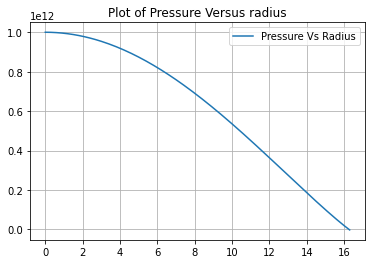

C:\Users\jfont\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


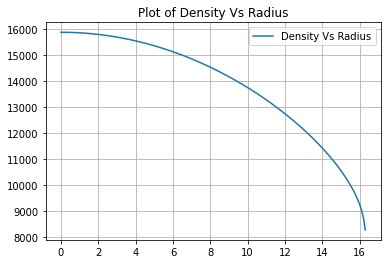

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#VALUES
c=0.00349
n=0.528
q0=8300
pc=10**12
G=9.8

#initial radius and final radius
r= 0.0001
#initial conditions
p=pc
m=0

#differential equations
def f1(r,p,m,q): 
    return (-1*(G*m*q)/(r**2)) 

def f2(r,p,m,q): 
    return (4*(np.pi)*q*(r**2))

#density
def den(q0, c, p, n): 
    return (q0+c*p**n)


def rk4( r,p,m,q0, c, n):
    dr=0.1
    i=0
    q=den(q0, c, p, n)
    
    pressure = []
    density= []
    radius=[]
    mass=[]
    
   # Append initial values
    pressure.append(p)
    density.append(q)
    radius.append(r)
    mass.append(m)
    
    print ("{:<8} {:<20} {:<20} {:<20} {:<10}".format('i','r', 'p', 'm', 'q'))
    print ("{:<8} {:<20} {:<20} {:<20} {:<10}".format(i,r, p, m, q))
    #for j in range(1, 40 + 1):
    while p>=0:
                
        k1 = dr* f1(r,p,m,q)  
        k11 = dr*f2(r,p,m,q)
                
        k2 = dr*f1(r+0.5 * dr, p+0.5 * k1, m+0.5 * k11, q)
        k22 = dr*f2(r+0.5 * dr, p+0.5 * k1, m+0.5 * k11, q)
        
        k3 = dr*f1(r+0.5 * dr, p+0.5 * k2, m+0.5 * k22, q)
        k33 = dr*f2(r+0.5 * dr, p+0.5 * k2, m+0.5 * k22, q)
        
        k4 = dr*f1(r+dr, p+k3, m+k33, q)
        k44 = dr*f2(r+dr, p+k3, m+k33, q)
        
        r=r+dr
        p= p + (k1 + 2*(k2 + k3 ) + k4) / 6
        m= m + (k11 + 2*(k22 + k33 ) + k44) / 6
        q=den(q0, c, p, n)
        i=i+1
        print ("{:<8} {:<20} {:<20} {:<20} {:<10}".format(i,r, p, m, q))
        #display(i)
        
        pressure.append(p)
        density.append(q)
        radius.append(r)
        mass.append(m)
        
    return pressure, density, radius, mass

[pressure, density, radius, mass]=rk4( r,p,m,q0, c, n)

plt.figure()
# plots needed
plt.plot(radius, pressure, label='Pressure Vs Radius')
plt.legend()
plt.grid()
# displaying the title
plt.title("Plot of Pressure Versus radius")
plt.show()

plt.figure()
# plots needed
plt.plot(radius, density, label='Density Vs Radius')
plt.legend()
plt.grid()
# displaying the title
plt.title("Plot of Density Vs Radius")
plt.show()


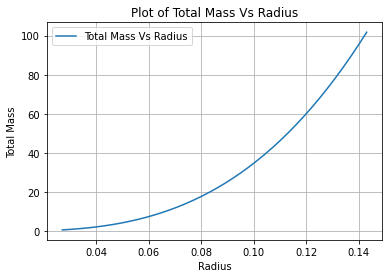

In [3]:
#PROBLEM 2
# Mass and radius depend of the pressure
# Variation of the pressure allows study of planets of different masses

#It is easier to detect high and low mass Planet through transit technique. 
# This is because, by changing the central pressure, the Total mass is varied
#Different total masses represent different planets (with different masses)

import numpy as np
import matplotlib.pyplot as plt

#values
c=0.00349
n=0.528
q0=8300
G=9.8
 #differential equations
def f1(r,p,m,q): 
    return (-1*(G*m*q)/(r**2)) 

def f2(r,p,m,q): 
    return (4*(np.pi)*q*(r**2))

#density
def den(q0, c, p, n): 
    return (q0+c*p**n)

#Earth mass
E_mass=5.972 * 10**24

#initial radius and final radius
r= 0.000001
#initial conditions
m=0
p=10**6 #first value of range of Pc


def rk4( r,p,m,q0, c, n):
    
    dr=0.001
    i=0
    dpc=10000
    mf=0.1 
    
    Finalradius=[]
    Totalmass=[]
            
    while mf>=0.1 and mf<=100:
        p=p+dpc
        q=den(q0, c, p, n)
        
        while p>=0:
           k1 = dr* f1(r,p,m,q)  
           k11 = dr*f2(r,p,m,q)
                
           k2 = dr*f1(r+0.5 * dr, p+0.5 * k1, m+0.5 * k11, q)
           k22 = dr*f2(r+0.5 * dr, p+0.5 * k1, m+0.5 * k11, q)
        
           k3 = dr*f1(r+0.5 * dr, p+0.5 * k2, m+0.5 * k22, q)
           k33 = dr*f2(r+0.5 * dr, p+0.5 * k2, m+0.5 * k22, q)
        
           k4 = dr*f1(r+dr, p+k3, m+k33, q)
           k44 = dr*f2(r+dr, p+k3, m+k33, q)
        
           r=r+dr
           p= p + (k1 + 2*(k2 + k3 ) + k4) / 6
           m= m + (k11 + 2*(k22 + k33 ) + k44) / 6
           q=den(q0, c, p, n)
           i=i+1
           
        Rf= r
        mf=m 
        
    #Make arrays
        Finalradius.append(Rf)
        Totalmass.append(mf)
    return Finalradius, Totalmass

[Finalradius,Totalmass]=rk4( r,p,m,q0, c, n)



#display(radius)
plt.figure()
# plots needed
plt.plot(Finalradius, Totalmass, label='Total Mass Vs Radius')
plt.legend()
plt.grid()
plt.xlabel('Radius')
plt.ylabel('Total Mass')
# displaying the title
plt.title("Plot of Total Mass Vs Radius")
plt.show()

In [ ]:
#PROBLEM 3
# using Fe, H2O and MgSiO3

import numpy as np
import matplotlib.pyplot as plt

#values Fe
c1=0.00349
n1=0.528
q01=8300
G=9.8
#values H2O
c2=0.00311
n2=0.513
q02=1460
G2=9.8

#values MgSiO3
c3=0.00161
n3=0.541
q03=4100
G3=9.8


 #differential equations
def f1(r,p,m,q): 
    return (-1*(G*m*q)/(r**2)) 

def f2(r,p,m,q): 
    return (4*(np.pi)*q*(r**2))

#density
def den(q0, c, p, n): 
    return (q0+c*p**n)

#Earth mass
E_mass=5.972 * 10**24
#Earth Radius
E_r=6378.14

#initial radius and final radius
r= 0.000001
#initial conditions
m=0
p=10**8


 #first value of range of Pc


def rk4( r,p,m,q0, c, n):
    
    dr=0.01
    i=0
    dpc=10**7
    mf=0.1 
    
    Finalradius=[]
    Totalmass=[]
            
    while mf>=0.1 and mf<=10**7:
        q=den(q0, c, p, n)
        
        while p>=0:
           k1 = dr* f1(r,p,m,q)  
           k11 = dr*f2(r,p,m,q)
                
           k2 = dr*f1(r+0.5 * dr, p+0.5 * k1, m+0.5 * k11, q)
           k22 = dr*f2(r+0.5 * dr, p+0.5 * k1, m+0.5 * k11, q)
        
           k3 = dr*f1(r+0.5 * dr, p+0.5 * k2, m+0.5 * k22, q)
           k33 = dr*f2(r+0.5 * dr, p+0.5 * k2, m+0.5 * k22, q)
        
           k4 = dr*f1(r+dr, p+k3, m+k33, q)
           k44 = dr*f2(r+dr, p+k3, m+k33, q)
        
           r=r+dr
           p= p + (k1 + 2*(k2 + k3 ) + k4) / 6
           m= m + (k11 + 2*(k22 + k33 ) + k44) / 6
           q=den(q0, c, p, n)
           i=i+1
           
        Rf= r
        mf=m 
        
        #Make arrays
        Finalradius.append(Rf)
        Totalmass.append(mf)
        p=p+dpc
    return Finalradius, Totalmass

[Finalradius,Totalmass]=rk4( r,p,m,q01, c1, n1)
display(Totalmass)
[Finalradius2,Totalmass2]=rk4( r,p,m,q02, c2, n2)

[Finalradius3,Totalmass3]=rk4( r,p,m,q03, c3, n3)

display(Totalmass)




#display(radius)
plt.figure()
# plots needed
plt.plot(Finalradius, Totalmass, label='Mass-Radius -Fe')

plt.plot(Finalradius2, Totalmass2, label='Mass-Radius -H2O')

plt.plot(Finalradius3, Totalmass3, label='Mass-Radius -MgSiO3')

#Mercury
plt.errorbar(0.384,0.0553, yerr = .0005, fmt = 'x', label='Mercury')

#Venus
plt.errorbar(0.95,0.81, yerr = .0005, fmt = 'x', label='Venus')
#Earth
plt.errorbar(1,1, yerr = .0005, fmt = 'x',label='Earth')
#Mars
plt.errorbar(0.53,1.07, yerr = .005, fmt = 'x', label='Mars')


#Other Exoplanet
plt.errorbar(1.46,4.60, yerr =1.26, fmt = 'o', label='Kepler-10 b')
plt.errorbar(2.34,7.87, yerr =0.73, fmt = 'o', label='HD 97658 b')





plt.legend()
plt.grid()
plt.xlabel('Radius')
plt.ylabel('Total Mass')
# displaying the title
plt.title("Plot of Total Mass Vs Radius")
plt.show()